In [43]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Atividade 8

In [44]:
## importando a base de dados
base = pd.read_csv("ionosphere-1.data")

In [45]:
## criando o cabeçalho e trocando os valores do coluna 34
base2 = pd.read_csv("ionosphere-1.data", header = None)
base2[34].replace({"g":1}, inplace =True)
base2[34].replace({"b":0}, inplace =True)

In [46]:
X = base2[base2.columns[:-1]]
y = base2[base2.columns[-1:]]

    
# Valores de k a serem testados
k_values = np.arange(1, 120)

# Lista para armazenar as acurácias médias
mean_accuracies = []

# Realizar a busca pelo melhor valor de k
for k in k_values:
    # Criar o modelo KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Calcular a acurácia média utilizando a validação cruzada
    accuracies = cross_val_score(knn_model, X, y, cv=5)
    mean_accuracy = np.mean(accuracies)
    
    # Armazenar a acurácia média na lista
    mean_accuracies.append(mean_accuracy)
    
# Encontrar o melhor valor de k com base na acurácia média
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

# Criar o modelo KNN com o melhor valor de k
best_model = KNeighborsClassifier(n_neighbors=best_k)

# Treinar o modelo
best_model.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [47]:
print(f"Melhor valor de k: {best_k}")
print(f"Acurácia média: {best_accuracy}")

Melhor valor de k: 2
Acurácia média: 0.8718712273641852


In [48]:
## Separando os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e random state = 0.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [49]:
## modelo de predição
y_pred = best_model.predict(X_test) 

In [50]:
## Realizando a classificação e obtendo os seguintes resultados: Acurácia, Precisão, Recall, F1-Score
#print("Acurácia: : ", accuracy_score(y_test, y_pred)*100)
acc = accuracy_score(y_test, y_pred)*100 # calcular a acurácia do modelo
print(f"Acurácia do modelo: {acc:.2f}%")

Acurácia do modelo: 100.00%


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        62

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



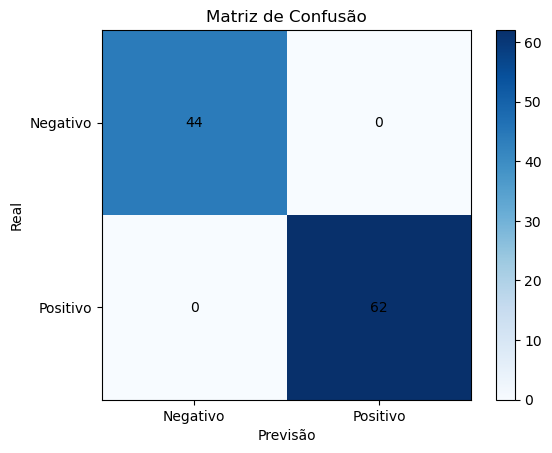

In [52]:
## Plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()